In [1]:
library(tidyverse)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [27]:
df <- read_csv('data/crimedata_csv_all_years_modified.csv')

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  TYPE = col_character(),
  YEAR = col_double(),
  MONTH = col_double(),
  DAY = col_double(),
  HOUR = col_double(),
  MINUTE = col_double(),
  HUNDRED_BLOCK = col_character(),
  NEIGHBOURHOOD = col_character(),
  X = col_double(),
  Y = col_double(),
  DATE = col_datetime(format = ""),
  DAY_OF_WEEK_NAME = col_character(),
  DAY_OF_WEEK = col_double()
)



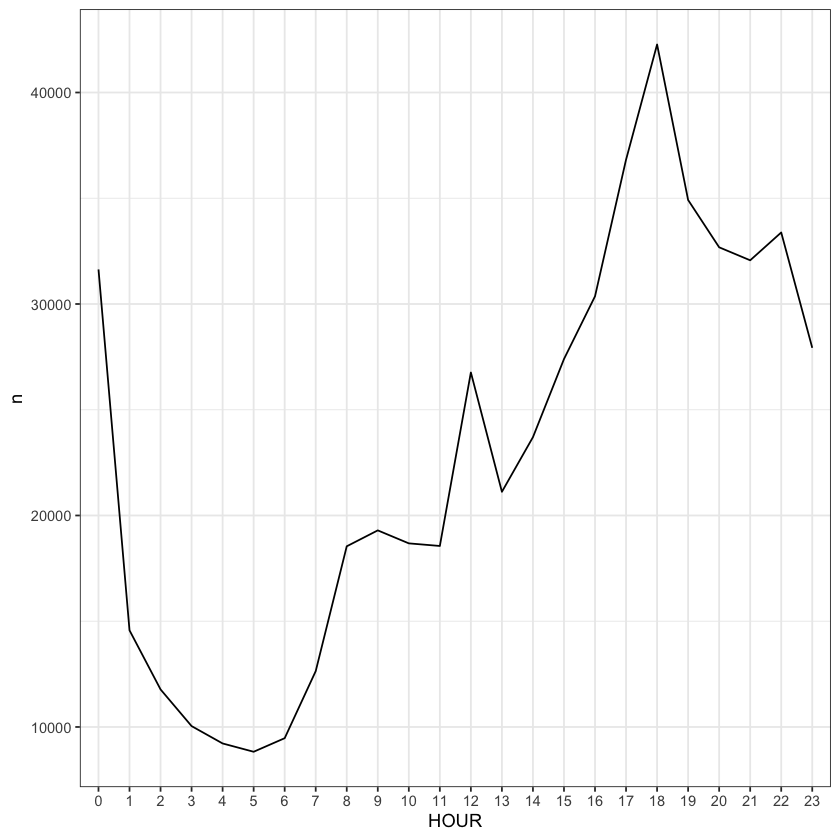

In [3]:
gp <- quote(HOUR)

df_mod <- df %>% 
    group_by(!!gp) %>%
    tally() %>% 
    mutate(!!gp := as.factor(!!gp)) %>%
    ggplot() +
    geom_line(aes(x=!!gp, y=n, group=1)) +
    theme_bw()

df_mod

In [34]:

plot_func <- function(df, start, end, neighbourhood_1, neighbourhood_2, crime, time_scale) {
    
    df <- df %>% filter(YEAR >= start & YEAR <= end)
    crime_title = crime
    neighbourhood_1_title = neighbourhood_1
    neighbourhood_2_title = neighbourhood_2
    
   if (crime == 'ALL') {
            crime_title = 'All Crimes'
            if (neighbourhood_1 == 'ALL') {
                neighbourhood_1_title = 'All Neighbourhoods'
                    df1 <- df %>% 
                        group_by({{time_scale}}) %>%
                        tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))

            } else {
                df1 <- df %>% 
                    filter(NEIGHBOURHOOD == neighbourhood_1) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
        }   
    } else {
    
    if (neighbourhood_1 == 'ALL') {
                neighbourhood_1_title = 'All Neighbourhoods'
                df1 <- df %>% 
                filter(TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
            
        } else {
            df1 <- df %>% 
                filter((NEIGHBOURHOOD == neighbourhood_1 & TYPE == crime)) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}})) 
        
    }
}

    if (crime == 'ALL') {
        crime_title = 'All Crimes'
        if (neighbourhood_2 == 'ALL') {
                neighbourhood_2_title = 'All Neighbourhoods'
                df2 <- df %>% 
                    group_by({{time_scale}}) %>%
                    tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
                
        } else {
            df2 <- df %>% 
                filter(NEIGHBOURHOOD == neighbourhood_2) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
        }   
    } else {
        
        if (neighbourhood_2 == 'ALL') {
                neighbourhood_2_title = 'All Neighbourhoods'
                df2 <- df %>% 
                filter(TYPE == crime) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
            
        } else {
            df2 <- df %>% 
                filter((NEIGHBOURHOOD == neighbourhood_2 & TYPE == crime)) %>%
                group_by({{time_scale}}) %>%
                tally() %>% 
    mutate({{time_scale}} := as.factor({{time_scale}}))
    }
                    }
    ggplot() +
        geom_line(df1, mapping = aes(x={{time_scale}}, y=n, group=1), color='blue') +
        geom_line(df2, mapping = aes(x={{time_scale}}, y=n, group=1), color='red') +
        ylab('Number of Crimes') +
        ggtitle(paste(neighbourhood_1_title, "vs", neighbourhood_2_title, ":", crime_title)) +
        theme_bw()
}

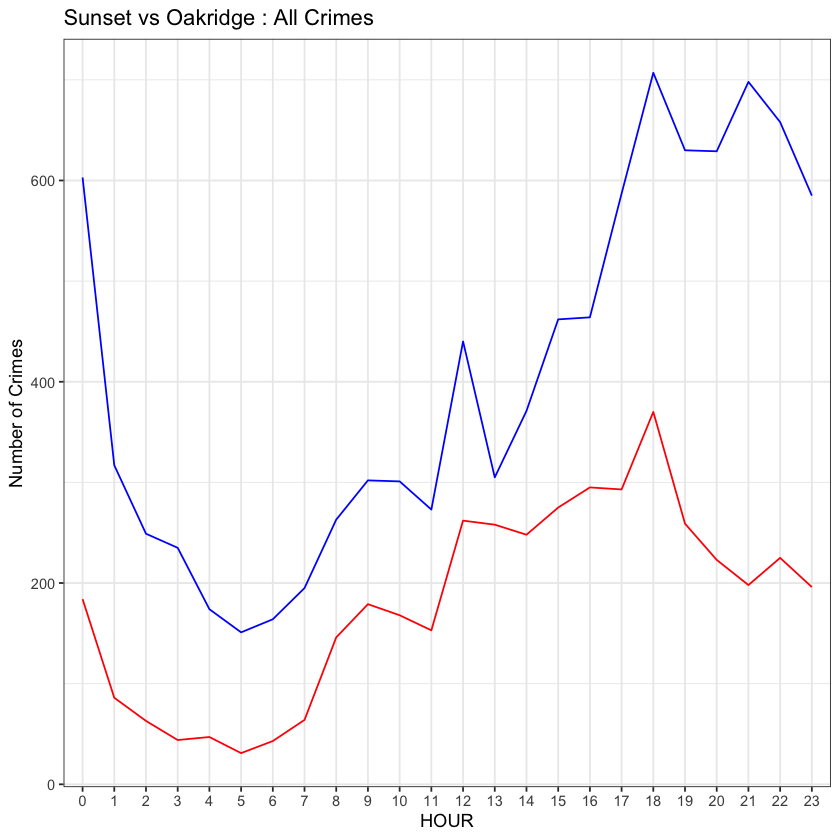

In [37]:
plot_func(df, 2005, 2012, 'Sunset', 'Oakridge', 'ALL', HOUR)

In [62]:
list_of_locations <- df['NEIGHBOURHOOD'] %>% drop_na() %>% distinct() %>% add_row('NEIGHBOURHOOD' = 'ALL')

In [75]:
temp <- list()
j <- 1
for (i in list_of_locations[['NEIGHBOURHOOD']]) {
    
    temp[[j]] <- list(label = i, value = i)
    
    j <- j + 1
}

In [76]:
temp

[[1]]
[[1]]$label
[1] "Oakridge"

[[1]]$value
[1] "Oakridge"


[[2]]
[[2]]$label
[1] "Fairview"

[[2]]$value
[1] "Fairview"


[[3]]
[[3]]$label
[1] "West End"

[[3]]$value
[1] "West End"


[[4]]
[[4]]$label
[1] "Central Business District"

[[4]]$value
[1] "Central Business District"


[[5]]
[[5]]$label
[1] "Hastings-Sunrise"

[[5]]$value
[1] "Hastings-Sunrise"


[[6]]
[[6]]$label
[1] "Strathcona"

[[6]]$value
[1] "Strathcona"


[[7]]
[[7]]$label
[1] "Grandview-Woodland"

[[7]]$value
[1] "Grandview-Woodland"


[[8]]
[[8]]$label
[1] "Kitsilano"

[[8]]$value
[1] "Kitsilano"


[[9]]
[[9]]$label
[1] "Kensington-Cedar Cottage"

[[9]]$value
[1] "Kensington-Cedar Cottage"


[[10]]
[[10]]$label
[1] "Sunset"

[[10]]$value
[1] "Sunset"


[[11]]
[[11]]$label
[1] "Mount Pleasant"

[[11]]$value
[1] "Mount Pleasant"


[[12]]
[[12]]$label
[1] "Shaughnessy"

[[12]]$value
[1] "Shaughnessy"


[[13]]
[[13]]$label
[1] "Marpole"

[[13]]$value
[1] "Marpole"


[[14]]
[[14]]$label
[1] "West Point Grey"

[[14]]$value
[1] "West Point Grey"


[[15]]
[[15]]$label
[1] "Victoria-Fraserview"

[[15]]$value
[1] "Victoria-Fraserview"


[[16]]
[[16]]$label
[1] "Kerrisdale"

[[16]]$value
[1] "Kerrisdale"


[[17]]
[[17]]$label
[1] "Riley Park"

[[17]]$value
[1] "Riley Park"


[[18]]
[[18]]$label
[1] "Arbutus Ridge"

[[18]]$value
[1] "Arbutus Ridge"


[[19]]
[[19]]$label
[1] "Renfrew-Collingwood"

[[19]]$value
[1] "Renfrew-Collingwood"


[[20]]
[[20]]$label
[1] "Killarney"

[[20]]$value
[1] "Killarney"


[[21]]
[[21]]$label
[1] "Dunbar-Southlands"

[[21]]$value
[1] "Dunbar-Southlands"


[[22]]
[[22]]$label
[1] "South Cambie"

[[22]]$value
[1] "South Cambie"


[[23]]
[[23]]$label
[1] "ALL"

[[23]]$value
[1] "ALL"

In [78]:
temp1 <- list()
for (i in list_of_locations[['NEIGHBOURHOOD']]) {
    
    temp1 <- c(temp1, i)
}

In [79]:
temp1

[[1]]
[1] "Oakridge"

[[2]]
[1] "Fairview"

[[3]]
[1] "West End"

[[4]]
[1] "Central Business District"

[[5]]
[1] "Hastings-Sunrise"

[[6]]
[1] "Strathcona"

[[7]]
[1] "Grandview-Woodland"

[[8]]
[1] "Kitsilano"

[[9]]
[1] "Kensington-Cedar Cottage"

[[10]]
[1] "Sunset"

[[11]]
[1] "Mount Pleasant"

[[12]]
[1] "Shaughnessy"

[[13]]
[1] "Marpole"

[[14]]
[1] "West Point Grey"

[[15]]
[1] "Victoria-Fraserview"

[[16]]
[1] "Kerrisdale"

[[17]]
[1] "Riley Park"

[[18]]
[1] "Arbutus Ridge"

[[19]]
[1] "Renfrew-Collingwood"

[[20]]
[1] "Killarney"

[[21]]
[1] "Dunbar-Southlands"

[[22]]
[1] "South Cambie"

[[23]]
[1] "ALL"